In [42]:
# read data and doing basic analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r'data\bitcoin_price_Training - Training.csv')

In [45]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [46]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [47]:
df.shape

(1556, 7)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [50]:
# data preprocessing

In [51]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [52]:
df.Date = df.Date.astype('datetime64[ns]')

In [53]:
df.Date.min()

Timestamp('2013-04-28 00:00:00')

In [54]:
df.Date.max()

Timestamp('2017-07-31 00:00:00')

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
# sort dataset from oldest to recent

In [57]:
data = df.sort_index(ascending=False).reset_index()

In [58]:
# analysing change in price overtime

In [59]:
data.drop('index', axis=1, inplace=True)

In [60]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

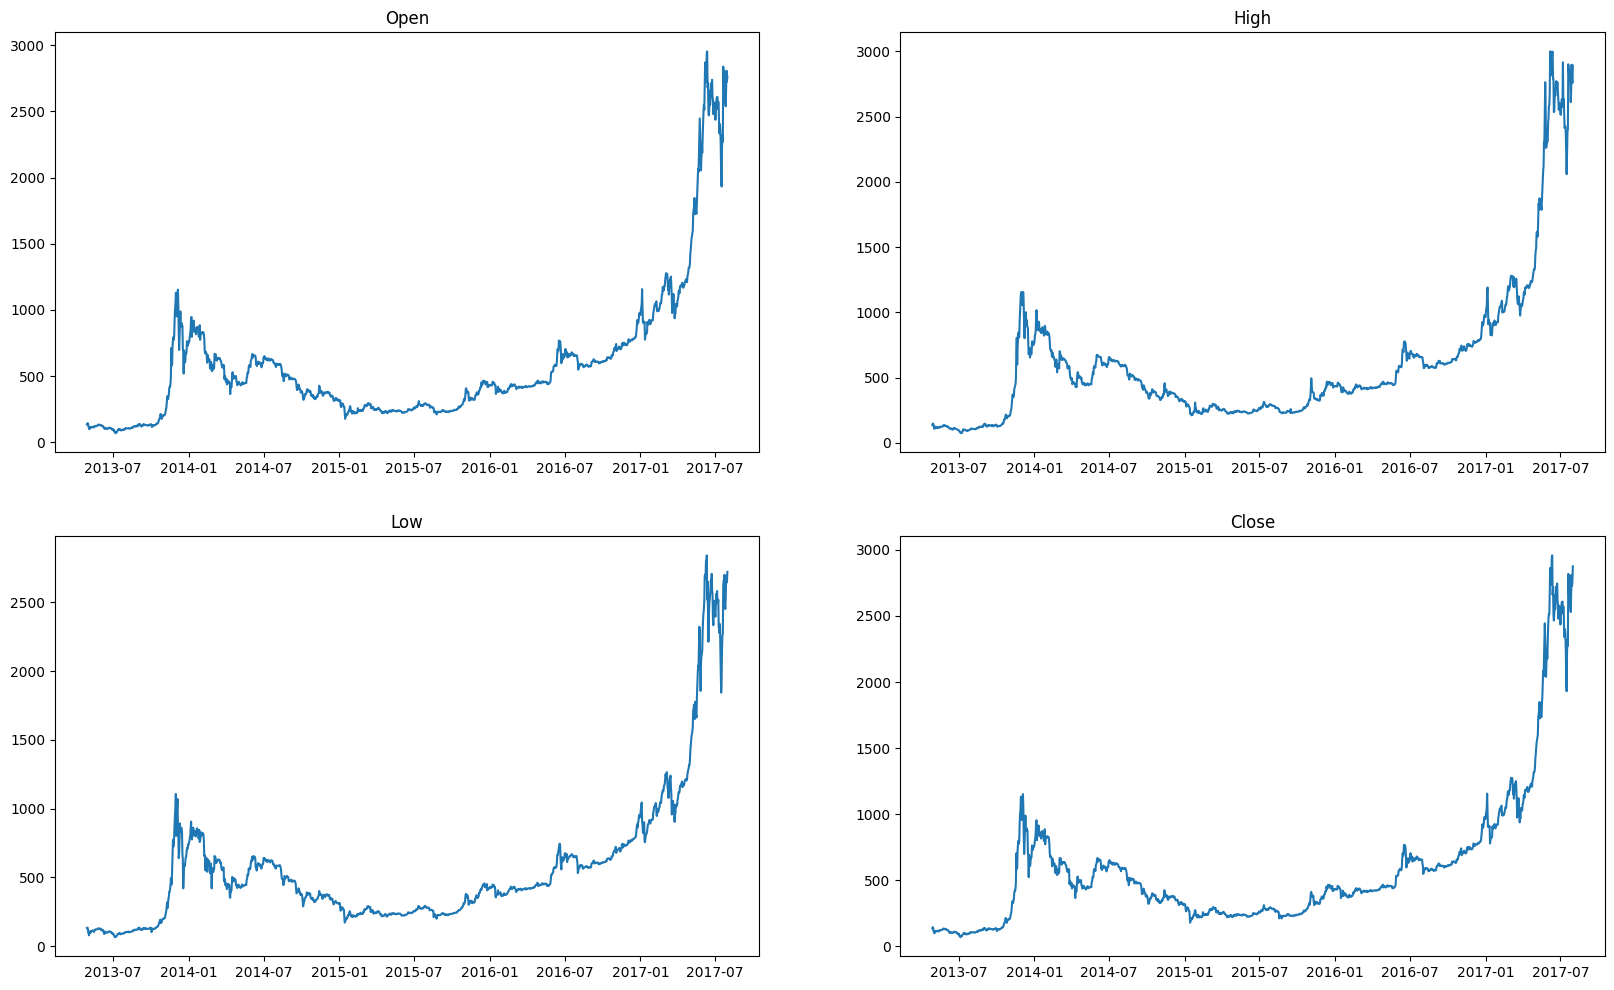

In [61]:
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df.Date, df[col])
    plt.title(col)

In [62]:
# analysing open, high, low, close value

In [63]:
sample = data[0:50]

In [64]:
import chart_studio as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [65]:
init_notebook_mode(connected=True)

In [66]:
trace = go.Candlestick(x=sample.Date,
                       high=sample.High,
                       open=sample.Open,
                       close=sample.Close,
                       low=sample.Low)

In [67]:
trace

Candlestick({
    'close': array([134.21, 144.54, 139.  , 116.99, 105.21,  97.75, 112.5 , 115.91, 112.3 ,
                    111.5 , 113.57, 112.67, 117.2 , 115.24, 115.  , 117.98, 111.5 , 114.22,
                    118.76, 123.02, 123.5 , 121.99, 122.  , 122.88, 123.89, 126.7 , 133.2 ,
                    131.98, 133.48, 129.75, 129.  , 132.3 , 128.8 , 129.  , 129.3 , 122.29,
                    122.22, 121.42, 121.65, 118.  , 111.5 , 108.3 , 100.  , 106.35, 108.9 ,
                    108.15, 104.  ,  99.98,  99.99,  99.51]),
    'high': array([135.98, 147.49, 146.93, 139.89, 125.6 , 108.13, 115.  , 118.8 , 124.66,
                   113.44, 115.78, 113.46, 122.  , 118.68, 117.45, 118.7 , 119.8 , 115.81,
                   118.76, 125.3 , 125.25, 124.5 , 123.62, 123.  , 124.  , 126.93, 133.85,
                   133.22, 136.  , 135.47, 130.58, 132.59, 132.25, 129.9 , 129.78, 129.4 ,
                   122.5 , 123.84, 123.47, 123.1 , 119.  , 111.42, 108.99, 110.1 , 109.6 ,
         

In [68]:
candle_data = [trace]

In [69]:
layout = {
    'title':'Bitcoin Historical Price',
    'xaxis':{'title':'Date'}
}

In [70]:
fig = go.Figure(data=candle_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [71]:
# analysing closing price

In [72]:
data.Close

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

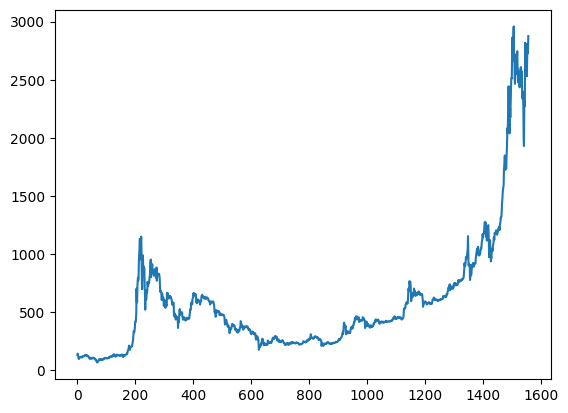

In [73]:
data.Close.plot()

In [74]:
data.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

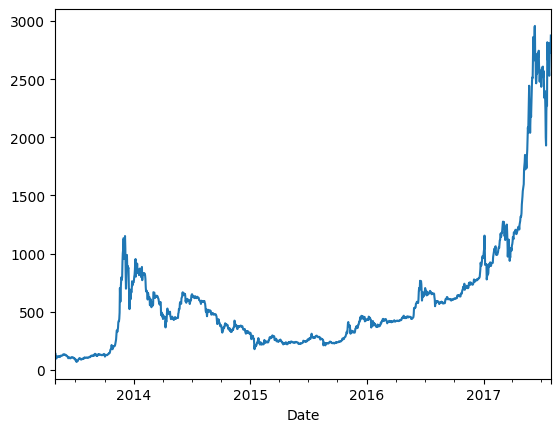

In [75]:
data.Close.plot()

<Axes: xlabel='Date'>

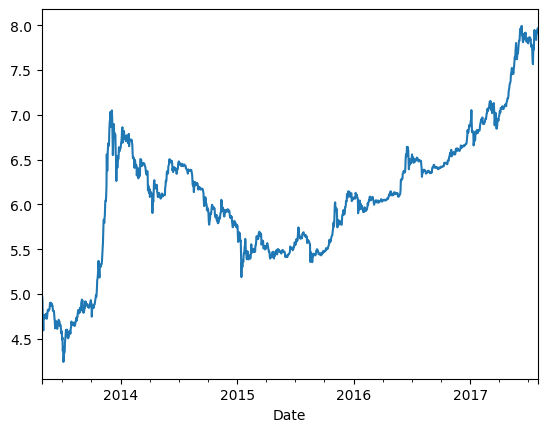

In [76]:
np.log1p(data.Close).plot()

In [77]:
### Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases..

### log scale is always better if u have outliers or some high values in data

In [78]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [80]:
data.Close.resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

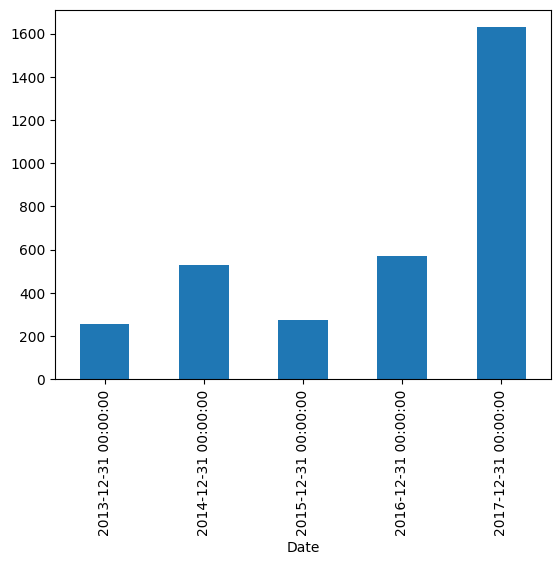

In [82]:
data.Close.resample('YE').mean().plot(kind='bar')

<Axes: xlabel='Date'>

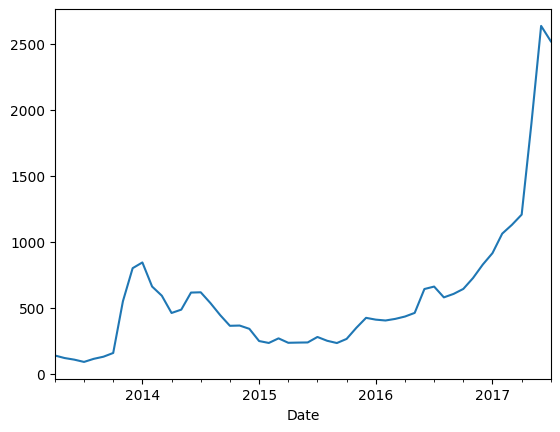

In [86]:
data.Close.resample('ME').mean().plot()

In [87]:
# analysing daily change in closing price

In [88]:
data.Close

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [94]:
data['Close_change'] = data.Close.pct_change()*100

<Axes: xlabel='Date'>

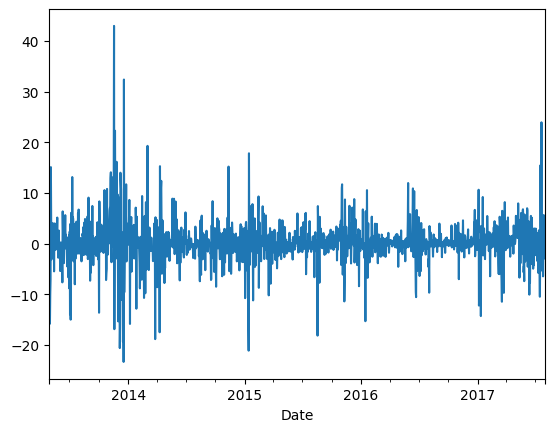

In [96]:
data.Close_change.plot()

In [104]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [102]:
cf.go_offline()

NameError: name 'cf' is not defined